In [148]:
import tmdbsimple as tmdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tmdb.API_KEY = "60dde32875c0d3c5679496aba9fb3465"
tmdb.REQUESTS_TIMEOUT = 10


In [149]:
df = pd.DataFrame(columns=['Title', 'Budget', 'Rating'])
URL = "http://files.tmdb.org/p/exports/movie_ids_04_01_2023.json.gz"
dfidlist = pd.read_json(URL, compression='gzip', lines=True)
idlist = []

for i in dfidlist['id'].head(10):
    movie = tmdb.Movies(i)
    response = movie.info()
    tempdf = pd.DataFrame([[movie.title, movie.budget, movie.vote_average]], columns=[
                          'Title', 'Budget', 'Rating'])
    df = pd.concat([df, tempdf])

df['Budget'] = df['Budget'].astype(float)


df


,Title,Budget,Rating
0,Blondie,0.0,6.750
0,"Peter Voss, Thief of Millions",0.0,0.000
0,Love at Twenty,0.0,6.700
0,New World Disorder 9: Never Enough,0.0,6.000
0,Sesame Street: Elmo Loves You!,0.0,0.000
0,Ariel,0.0,7.100
0,Shadows in Paradise,0.0,7.183
0,Four Rooms,4000000.0,5.757
0,Judgment Night,21000000.0,6.558
0,Life in Loops (A Megacities RMX),42000.0,7.708


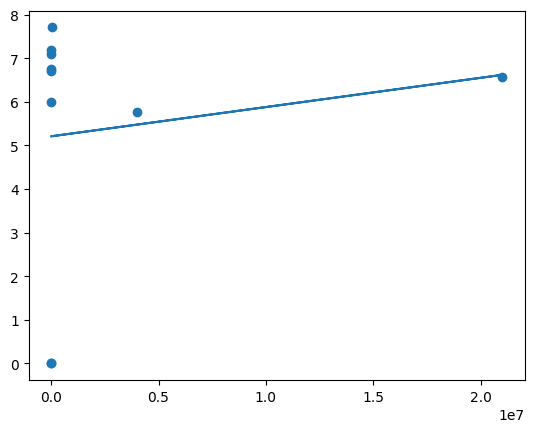

In [150]:

x = df['Budget']
y = df['Rating']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x))
